<a href="https://colab.research.google.com/github/MauricioTellezNava/ejercicios_automatizacion_y_analisis/blob/main/ecobici_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga de datos

In [3]:
df2022_01 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-01.csv")
df2022_02 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-02.csv")
df2022_03 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-03.csv")
df2022_04 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-04.csv")
df2022_05 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-05.csv")
df2022_06 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-06.csv")
df2022_07 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-07.csv")
df2022_08 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-08.csv")
df2022_09 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-09.csv")
df2022_10 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-10.csv")
df2022_11 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-11.csv")
df2022_12 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-12.csv")
df2023_01 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2023-01.csv")
df2023_02 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2023-02.csv")
df2023_03 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2023-03.csv")
df_estaciones = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/estaciones_ecobici_sist_anterior.csv")

# Corrigiendo el nombre de las columnas de df2022_09
df2022_09.rename(columns={'Genero_usuario':'Genero_Usuario', 'Edad_usuario':'Edad_Usuario', 'Bici':'Bici', 'CE_retiro':'Ciclo_Estacion_Retiro', 'Fecha_retiro':'Fecha_Retiro',
                          'Hora_retiro':'Hora_Retiro', 'CE_arribo':'Ciclo_EstacionArribo', 'Fecha_arribo':'Fecha Arribo', 'Hora_arribo':'Hora_Arribo'}, inplace=True)

<ipython-input-3-bde28ea09e21>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2022_02 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-02.csv")
<ipython-input-3-bde28ea09e21>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2022_03 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-03.csv")
<ipython-input-3-bde28ea09e21>:8: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2022_08 = pd.read_csv("/content/drive/MyDrive/Ejercicios de Machine Learning y Deep Learning/ADO/ecobici/2022-08.csv")


# Concatenando los dataframes en df y ajustando datos

In [4]:
df_list = [df2022_01, df2022_02, df2022_03, df2022_04, df2022_05,
           df2022_06, df2022_07, df2022_08, df2022_09, df2022_10,
           df2022_11, df2022_12, df2023_01, df2023_02, df2023_03]

df = pd.concat(df_list)

In [5]:
# Ajustes a df
# Eliminado el caracter ?
df = df[df['Genero_Usuario'] != '?']

# Eliminando valores nulos en Ciclo_Estacion_Retiro
df = df.dropna(subset=['Ciclo_Estacion_Retiro']) 

# Eliminando valores no transferibles a enteros (2.45% de la muestra actual)
eliminables = ['Kiosco Reciclar Fue CE-008','kiosco Buscar (tal vez CE-009)', 'Tag ID defectuosa NS 1649 (Kiosco478)', 'Kiosco 376']
df = df.drop(df[df['Ciclo_Estacion_Retiro'].isin(eliminables)].index)
df = df.drop(df[df['Ciclo_EstacionArribo'].isin(eliminables)].index)

In [6]:
# Vista previa de los datos
print(df.shape)
df.head()

(7283029, 9)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,F,35.0,11253,286,31/01/2022,17:33.0,75,31/01/2022,24:14.0
1,F,57.0,11287,68,31/01/2022,55:03.0,231,31/01/2022,24:15.0
2,F,41.0,8641,23,31/01/2022,50:35.0,115,31/01/2022,24:23.0
3,M,34.0,11554,211,31/01/2022,20:26.0,217,31/01/2022,24:29.0
4,M,27.0,7658,165,31/01/2022,08:33.0,356,31/01/2022,24:42.0


In [7]:
# Segunda iteración
erroresnum_Ciclo_EstacionArribo =  ['390-391', '445-446', '107-108', '264-275', '268-269', '273-274',
       '271-272', '158-159', '192-193', '237-238', '235-236', '266-267']
erroresnum_Ciclo_Estacion_Retiro = ['445-446', '390-391', '107-108', '264-275', '268-269', '273-274',
       '271-272', '158-159', '192-193', '237-238', '235-236','266-267']


# Asignar una nueva distribución de valores
def asignar_valores_distribucion(valores, distribucion):
    valores_asignados = valores.copy()
    for valor in distribucion.keys():
        mascara = (valores == valor)
        valores_asignados[mascara] = np.random.choice(distribucion[valor], size=np.sum(mascara))
    return valores_asignados

# Obtener las proporciones de valores erróneos
prop_errores_Ciclo_EstacionArribo = {}
for valor in erroresnum_Ciclo_EstacionArribo:
    prop_errores_Ciclo_EstacionArribo[valor] = len(df[df['Ciclo_EstacionArribo'] == valor]) / len(df)

prop_errores_Ciclo_Estacion_Retiro = {}
for valor in erroresnum_Ciclo_Estacion_Retiro:
    prop_errores_Ciclo_Estacion_Retiro[valor] = len(df[df['Ciclo_Estacion_Retiro'] == valor]) / len(df)

# Asignar nuevos valores a Ciclo_EstacionArribo y Ciclo_Estacion_Retiro
distribucion_Ciclo_EstacionArribo = {valor: df['Ciclo_EstacionArribo'][df['Ciclo_EstacionArribo'] != valor].values 
                                    for valor in erroresnum_Ciclo_EstacionArribo}
distribucion_Ciclo_Estacion_Retiro = {valor: df['Ciclo_Estacion_Retiro'][df['Ciclo_Estacion_Retiro'] != valor].values 
                                      for valor in erroresnum_Ciclo_Estacion_Retiro}

df['Ciclo_EstacionArribo'] = pd.to_numeric(df['Ciclo_EstacionArribo'], errors='coerce')
df['Ciclo_EstacionArribo'] = asignar_valores_distribucion(df['Ciclo_EstacionArribo'], distribucion_Ciclo_EstacionArribo)
df['Ciclo_Estacion_Retiro'] = pd.to_numeric(df['Ciclo_Estacion_Retiro'], errors='coerce')
df['Ciclo_Estacion_Retiro'] = asignar_valores_distribucion(df['Ciclo_Estacion_Retiro'], distribucion_Ciclo_Estacion_Retiro)


In [8]:
# Ajustando Ciclo_Estacion_Retiro y Ciclo_EstacionArribo a valores int
df = df.dropna(subset=['Ciclo_Estacion_Retiro']) 
df = df.dropna(subset=['Ciclo_EstacionArribo']) 
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].astype(int)
df['Ciclo_EstacionArribo'] = df['Ciclo_EstacionArribo'].astype(int)
print(df.shape)
df.head()

(6910351, 9)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,F,35.0,11253,286,31/01/2022,17:33.0,75,31/01/2022,24:14.0
1,F,57.0,11287,68,31/01/2022,55:03.0,231,31/01/2022,24:15.0
2,F,41.0,8641,23,31/01/2022,50:35.0,115,31/01/2022,24:23.0
3,M,34.0,11554,211,31/01/2022,20:26.0,217,31/01/2022,24:29.0
4,M,27.0,7658,165,31/01/2022,08:33.0,356,31/01/2022,24:42.0


# Procesamiento de datos

<Axes: >

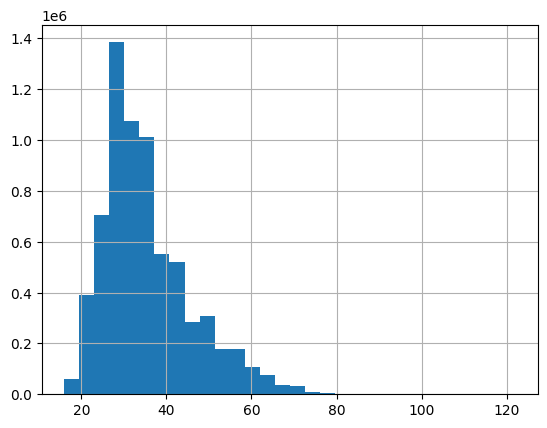

In [9]:
df['Edad_Usuario'].hist(bins=30)

# Haciendo join con el dataset df_estaciones

Es preciso realizar dos joins: 
- dff['Ciclo_Estacion_Retiro] con df_estaciones[num_cicloestacion] (prefijo: salida)
- df_estaciones[num_cicloestacion] con dff['Ciclo_EstacionArribo] (prefijo: arribo)

Columnas relevantes de df_estaciones:
* num_cicloestacion (ID)

* nombre (el nombre es la concatenación d ela calle principal con la secundaria)
* colonia
* alcaldia
* latitud
* longitud
* tipo_ce
* candados




In [10]:
# dff['Ciclo_Estacion_Retiro] con df_estaciones[num_cicloestacion] (prefijo: salida) 
result = pd.merge(df, df_estaciones[['num_cicloestacion', 'nombre', 'colonia', 'alcaldia', 'latitud', 'longitud', 'tipo_ce', 'candados']], 
                  left_on='Ciclo_Estacion_Retiro', right_on='num_cicloestacion', how='left')

result = result.rename(columns={'nombre': 'salida_nombre',
                                'colonia': 'salida_colonia',
                                'alcaldia': 'salida_alcaldia',
                                'latitud': 'salida_latitud',
                                'longitud': 'salida_longitud',
                                'tipo_ce': 'salida_tipo_ce',
                                'candados': 'salida_candados'})

# df_estaciones[num_cicloestacion] con dff['Ciclo_EstacionArribo] (prefijo: arribo) 
result2 = pd.merge(result, df_estaciones[['num_cicloestacion', 'nombre', 'colonia', 'alcaldia', 'latitud', 'longitud', 'tipo_ce', 'candados']], 
                  left_on='Ciclo_EstacionArribo', right_on='num_cicloestacion', how='left')

result2 = result2.rename(columns={'nombre': 'arribo_nombre',
                                'colonia': 'arribo_colonia',
                                'alcaldia': 'arribo_alcaldia',
                                'latitud': 'arribo_latitud',
                                'longitud': 'arribo_longitud',
                                'tipo_ce': 'arribo_tipo_ce',
                                'candados': 'arribo_candados'})


In [11]:
result2 = result2.dropna()
result2.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,num_cicloestacion_x,...,salida_tipo_ce,salida_candados,num_cicloestacion_y,arribo_nombre,arribo_colonia,arribo_alcaldia,arribo_latitud,arribo_longitud,arribo_tipo_ce,arribo_candados
0,F,35.0,11253,286,31/01/2022,17:33.0,75,31/01/2022,24:14.0,286.0,...,3G,21.0,75.0,Alfonso Reyes - Atlixco,Hipódromo Condesa,CUAUHTEMOC,19.408676,-99.176759,3G,15.0
1,F,57.0,11287,68,31/01/2022,55:03.0,231,31/01/2022,24:15.0,68.0,...,4G,30.0,231.0,Isaac Newton - Aristóteles,Polanco,MIGUEL HIDALGO,19.429770,-99.193490,3G,27.0
2,F,41.0,8641,23,31/01/2022,50:35.0,115,31/01/2022,24:23.0,23.0,...,3G,36.0,115.0,Roma - Dinamarca,Juárez,CUAUHTEMOC,19.429947,-99.159698,3G,27.0
3,M,34.0,11554,211,31/01/2022,20:26.0,217,31/01/2022,24:29.0,211.0,...,3G,36.0,217.0,Euler - Av. Horacio,Polanco,MIGUEL HIDALGO,19.432888,-99.183605,4G,36.0
4,M,27.0,7658,165,31/01/2022,08:33.0,356,31/01/2022,24:42.0,165.0,...,3G,21.0,356.0,Matías Romero - Adolfo Prieto,Del Valle Centro,BENITO JUAREZ,19.381287,-99.170200,3G,18.0


In [13]:
print(result2.shape)
result2.columns

(6770321, 25)


Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo', 'num_cicloestacion_x', 'salida_nombre', 'salida_colonia',
       'salida_alcaldia', 'salida_latitud', 'salida_longitud',
       'salida_tipo_ce', 'salida_candados', 'num_cicloestacion_y',
       'arribo_nombre', 'arribo_colonia', 'arribo_alcaldia', 'arribo_latitud',
       'arribo_longitud', 'arribo_tipo_ce', 'arribo_candados'],
      dtype='object')

In [22]:
result2[['salida_nombre', 'arribo_nombre']].head()

,salida_nombre,arribo_nombre
0,13 de Septiembre - Avenida Patriotismo,Alfonso Reyes - Atlixco
1,Tamaulipas - Michoacán,Isaac Newton - Aristóteles
2,Reforma - Praga,Roma - Dinamarca
3,Isaac Newton - Horacio,Euler - Av. Horacio
4,Bajío - Eje 2 Pte. Monterrey,Matías Romero - Adolfo Prieto


# Exportando result2 a .csv